# Simple Collision Track Analysis

## Imports

In [3]:
from matplotlib import pyplot as plt
import openmc
import numpy as np
import pandas as pd
from pathlib import Path
from typing import Any

import scienceplots
plt.style.use(['science', 'notebook', 'grid', 'high-vis'])  # 'high-vis' 'grid' 'notebook' 'science' 'bright'

## Loading the data

In [4]:
data: Any = openmc.read_collision_track_file("../data/raw/collision_track.h5")

df = pd.DataFrame(
    {
        "r_x": data["r"]["x"],
        "r_y": data["r"]["y"],
        "r_z": data["r"]["z"],
        "u_x": data["u"]["x"],
        "u_y": data["u"]["y"],
        "u_z": data["u"]["z"],
        "E": data["E"],
        "dE": data["dE"],
        "time": data["time"],
        "wgt": data["wgt"],
        "event_mt": data["event_mt"],
        "delayed_group": data["delayed_group"],
        "cell_id": data["cell_id"],
        "nuclide_id": data["nuclide_id"],
        "material_id": data["material_id"],
        "universe_id": data["universe_id"],
        "n_collision": data["n_collision"],
        "particle": data["particle"],
        "parent_id": data["parent_id"],
        "progeny_id": data["progeny_id"],
    }
)

print(len(df))
df.head()

123302


,r_x,r_y,r_z,u_x,u_y,u_z,E,dE,time,wgt,event_mt,delayed_group,cell_id,nuclide_id,material_id,universe_id,n_collision,particle,parent_id,progeny_id
0,0.990735,-25.574324,-1.875586,-0.347468,0.710163,-0.612319,507551.121534,159239.306323,0.000046,1.0,2,0,3,50100,2,1,5,0,402,2
1,-0.057202,25.025043,-0.111511,-0.116979,-0.520571,-0.845767,614323.765257,155227.889654,0.000154,1.0,2,0,2,50100,2,1,2,0,407,41
2,-0.059899,25.013041,-0.131010,-0.116979,-0.520571,-0.845767,459095.875603,0.000000,0.000154,0.0,101,0,2,50100,2,1,3,0,407,41
3,-0.563580,-25.311076,-1.640763,-0.009993,-0.926967,0.375010,0.122461,0.000000,0.000310,0.0,101,0,3,50100,2,1,71,0,415,17
4,-1.581858,-26.326761,2.696689,-0.109828,-0.633189,-0.766166,720239.731062,69447.722868,0.000736,1.0,2,0,3,50100,2,1,2,0,769,91


In [5]:
timestamps = np.sort(df["time"].values)

detector1_times = timestamps[df["cell_id"] == 2]
detector2_times = timestamps[df["cell_id"] == 3]

## Export raw data to excel

In [ ]:
out_dir = Path("../results/data")
out_dir.mkdir(parents=True, exist_ok=True)

out_file = out_dir / "collision_track_raw.xlsx"
df.to_excel(out_file, index=False)
print(f"Saved {len(df)} rows to {out_file}")

Saved 123302 rows to ../results/data/collision_track_raw.xlsx


## Plotting a histogram

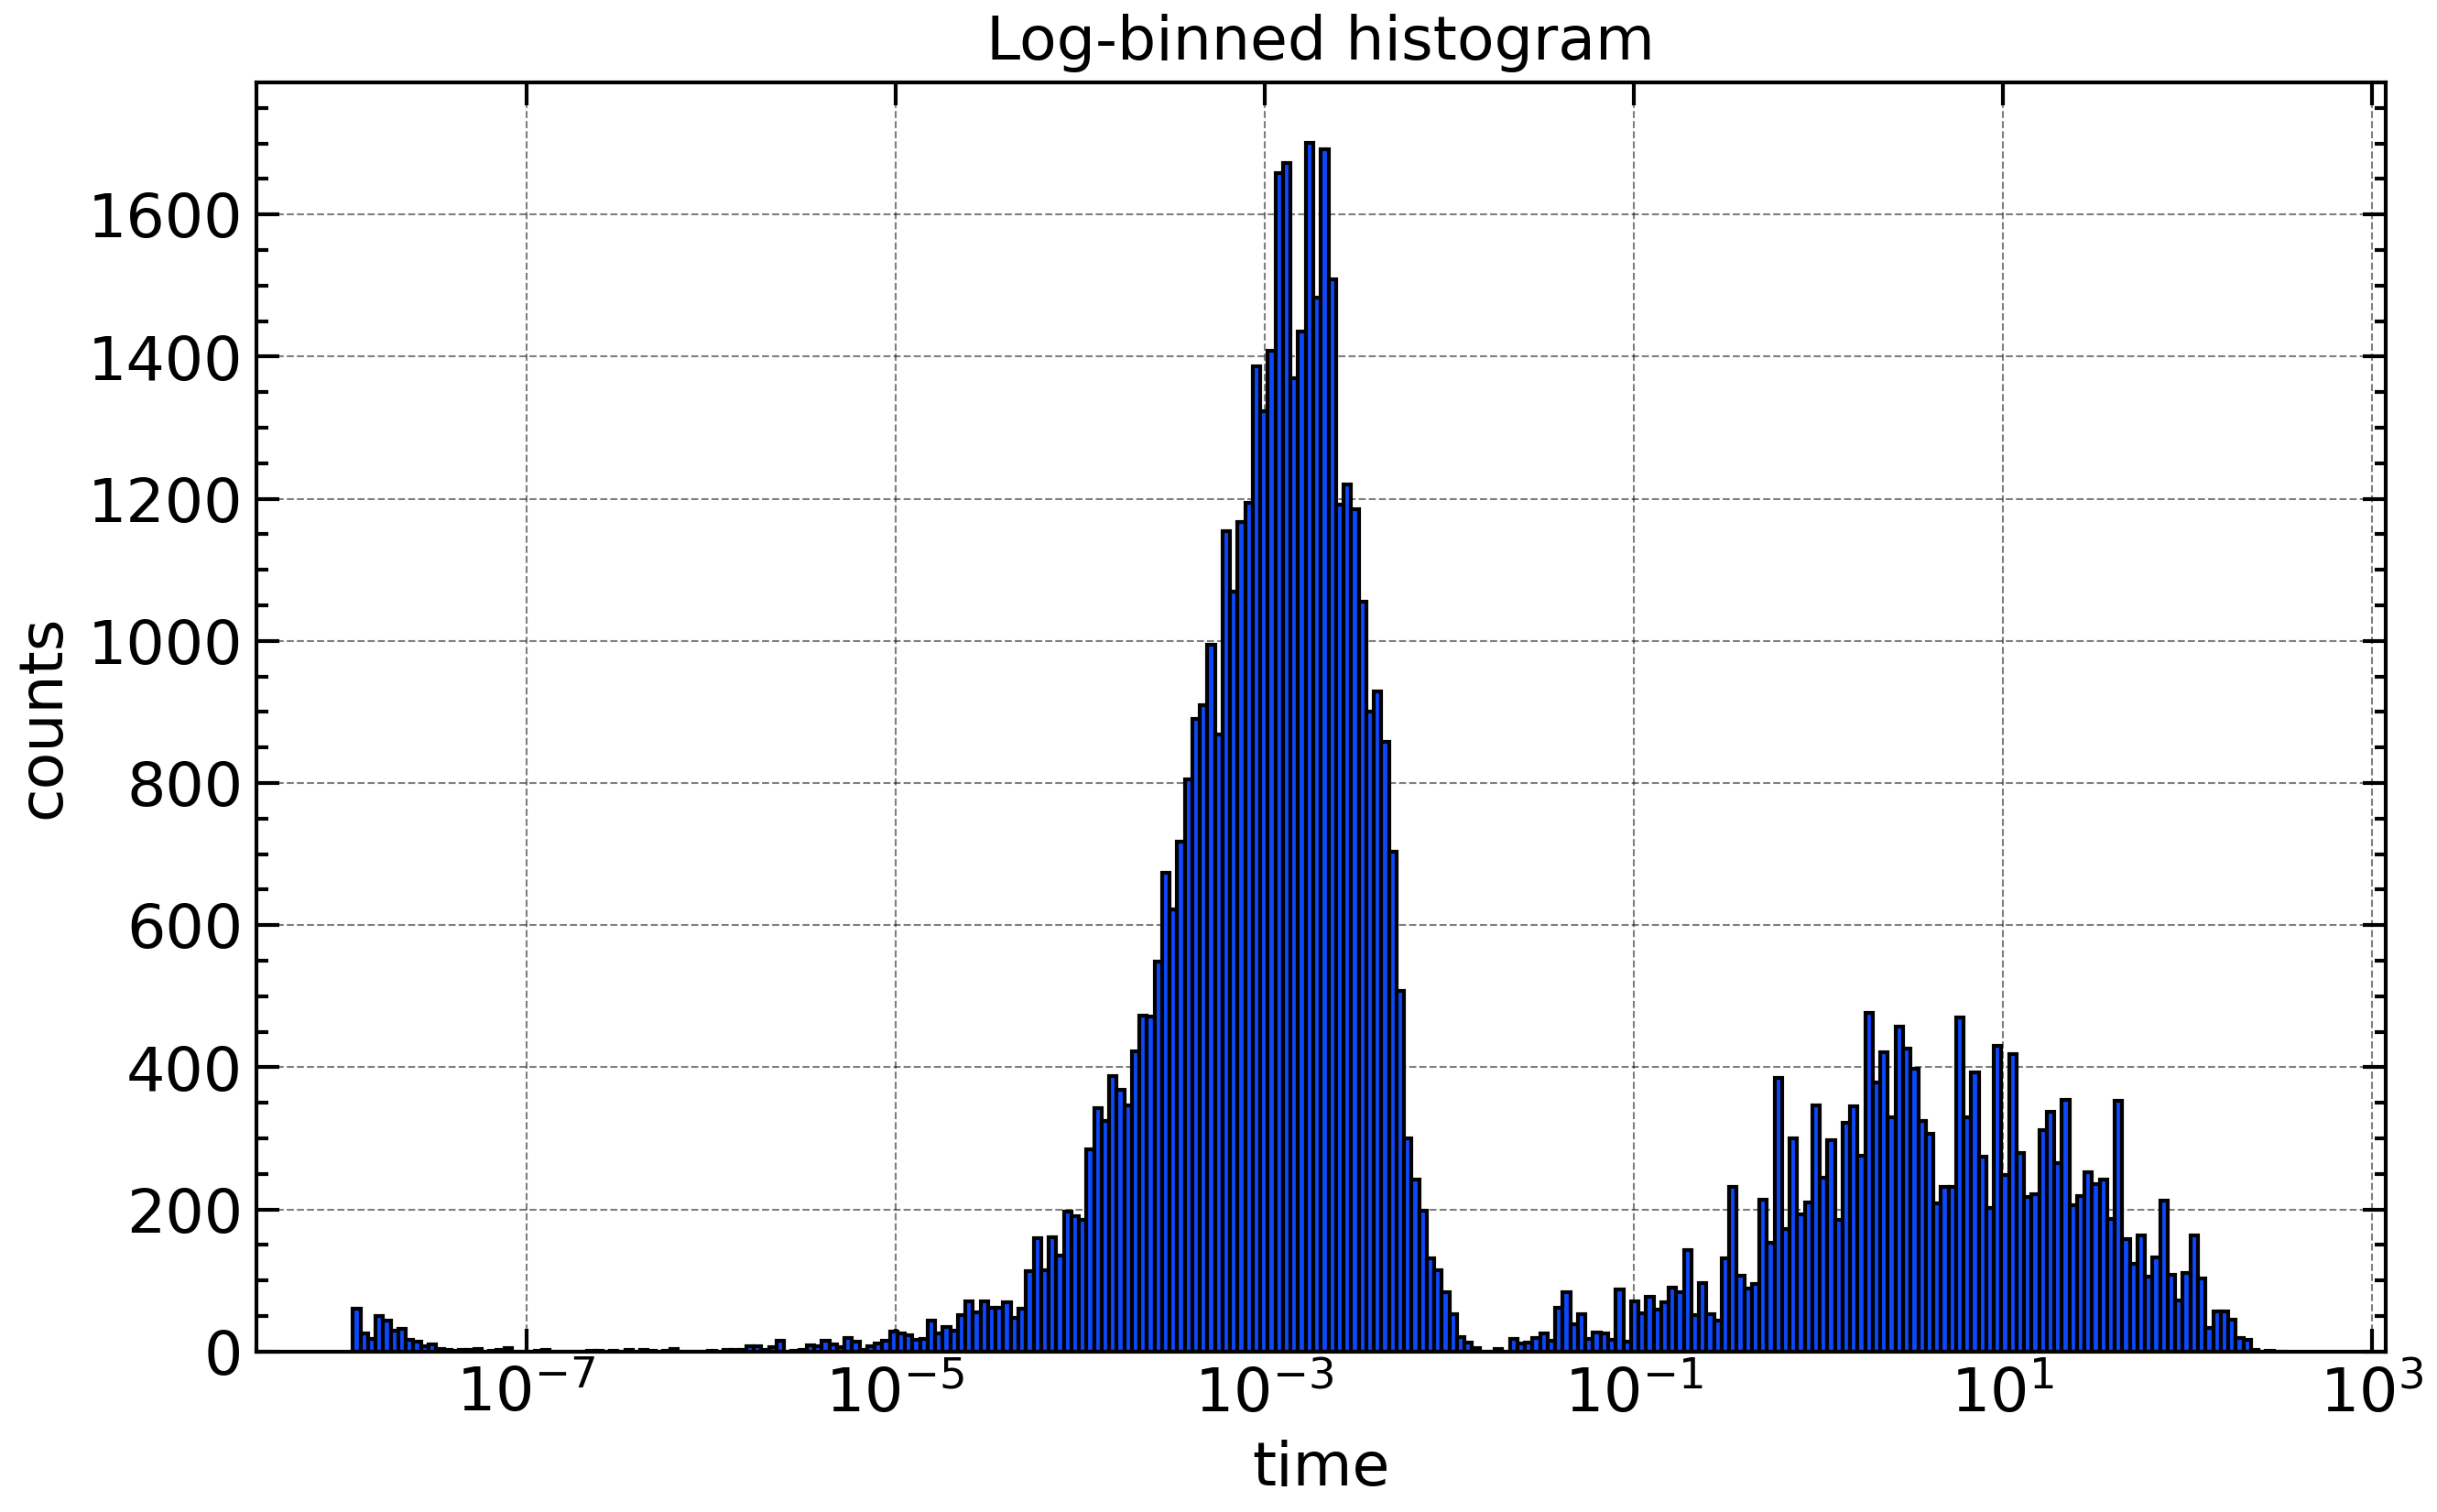

In [10]:
# Prepare timestamps: ensure numeric, finite, and strictly positive (log bins require > 0)
t = np.asarray(detector1_times, dtype=float)
t = t[np.isfinite(t)]
t = t[t > 0]

if t.size == 0:
    raise ValueError("No positive timestamps found in detector1_times; cannot compute log bins.")

# Number of log bins (adjust as needed)
nbins = 256

edges = np.logspace(np.log10(t.min()), np.log10(t.max()), nbins + 1)

# Compute histogram counts in log-spaced bins
counts, edges = np.histogram(t, bins=edges)
centers = (edges[:-1] + edges[1:]) / 2
widths = edges[1:] - edges[:-1]

# Make a DataFrame for easy inspection
hist_df = pd.DataFrame(
    {
        "count": counts,
        "left": edges[:-1],
        "right": edges[1:],
        "center": centers,
        "width": widths,
    }
)

# Optional: plot the histogram on a log x-axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.bar(centers, counts, width=widths, align="center", edgecolor="k")
ax.set_xscale("log")
ax.set_xlabel("time")
ax.set_ylabel("counts")
ax.set_title("Log-binned histogram")

out_dir = Path("../results/figures")
out_dir.mkdir(parents=True, exist_ok=True)
out_file = out_dir / "simple_collision_track_analysis_log_histogram_detector.png"
plt.savefig(out_file, bbox_inches="tight")

## Export binned data to excel

In [9]:
out_dir = Path("../results/data")
out_dir.mkdir(parents=True, exist_ok=True)

out_file = out_dir / "collision_track_binned.xlsx"
hist_df.to_excel(out_file, index=False)
print(f"Saved {len(hist_df)} rows to {out_file}")

Saved 256 rows to ../results/data/collision_track_binned.xlsx
